## Classification

Binary classification of gender

In [1]:
# Import dependencies
from os import listdir
from os.path import isfile, join, splitext, split

In [44]:
# List all file names in a given directory
def list_files(folder):
    textfiles = [join(folder, f) for f in listdir(folder) if isfile(join(folder, f)) and f.endswith(".txt")]
    return textfiles

In [3]:
f_files = list_files("celebs-gb/female")
m_files = list_files("celebs-gb/male")
X = f_files + m_files #X is usually used to denote the dataset to be trained and tested on, i.e. the features (or where features are extracted from)
y = ["female"] * len(f_files) + ["male"] * len(m_files) #y is usually used to store the labels/classes. Here we simply repeat female for how many female users we have, and then the same for male. Obviously X and y must be in same order.

print(len(X), len(y))
print(y.count("female"), y.count("male")) # more males than females

75 75
25 50


### Train/Test split

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state = 0, stratify=y)
print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

60 15
60 15


In [5]:
print(y_train.count("female"), y_train.count("male"))
print(y_test.count("female"), y_test.count("male"))

20 40
5 10


### Feature Extraction

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(input='filename', analyzer='word') # text files read in and text extracted (default = extract words (word tokenise) and count)

`fit_transform` both creates the vocabulary from the training data (fit), and creates a vector for each training instance (document), which in this case will be the counts for each word in the vocabulary. Because no restriction has been set on the vocabulary, every word type found in the training set will be included.

In [7]:
X_train_vectorized = vectorizer.fit_transform(X_train)
X_train_vectorized.shape

(60, 174103)

In [8]:
vectorizer.get_feature_names()[::5000]

['00',
 '30am',
 '6kgwu66sif',
 '_landonmoss',
 'angelskiss',
 'bbcfrontrow',
 'brexitwipe',
 'charger',
 'crept',
 'dg9kvdnbnm',
 'eaza5vhrdy',
 'ezrdicv0q1',
 'fsfefyqqmd',
 'gphxrpkk3k',
 'hhrl1zr76t',
 'ilovemaysunico',
 'jeby6gcaml',
 'kate_murphy_',
 'lasty',
 'lvornfjif0',
 'michelle_dyer',
 'na5fevgawe',
 'o5dco4fbly',
 'parisestcharlie',
 'prime',
 'rabbijoshy',
 'romilly',
 'sepia',
 'springsteen',
 'tbfdajen',
 'toward',
 'upotzq63h0',
 'w29jmfjeg5',
 'ww90ggeifw',
 'youknowwhatitis']

### Model Fitting

In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver='liblinear', random_state=0)
clf.fit(X_train_vectorized, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

### Model Predictions

In [10]:
X_test_vectorized = vectorizer.transform(X_test)
predictions = clf.predict(X_test_vectorized)
print(predictions)

['male' 'male' 'male' 'male' 'female' 'female' 'male' 'female' 'female'
 'male' 'female' 'male' 'male' 'male' 'female']


### Model Evaluation

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))
clf.classes_

Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

      female       0.50      0.60      0.55         5
        male       0.78      0.70      0.74        10

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15

[[3 2]
 [3 7]]


array(['female', 'male'], dtype='<U6')

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def confusion_matrix_heatmap(cm, index):
    cmdf = pd.DataFrame(cm, index = index, columns=index)
    dims = (5, 5)
    fig, ax = plt.subplots(figsize=dims)
    sns.heatmap(cmdf, annot=True, cmap="coolwarm", center=0)
    ax.set_ylabel('Actual')    
    ax.set_xlabel('Predicted')

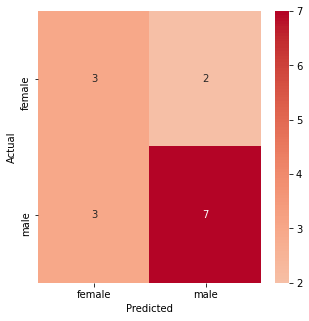

In [13]:
confusion_matrix_heatmap(confusion_matrix(y_test,predictions), clf.classes_)

In [14]:
pd.DataFrame(list(zip(X_test,y_test,predictions,y_test==predictions)), columns=["Instance", "Actual", "Predicted","Correct"])

,Instance,Actual,Predicted,Correct
0,celebs-gb/male/TomFletcher.txt,male,male,True
1,celebs-gb/male/AndreWinner.txt,male,male,True
2,celebs-gb/male/CraigyFerg.txt,male,male,True
3,celebs-gb/male/IanJamesPoulter.txt,male,male,True
4,celebs-gb/female/natashabdnfield.txt,female,female,True
5,celebs-gb/female/KellyOsbourne.txt,female,female,True
6,celebs-gb/male/OzzyOsbourne.txt,male,male,True
7,celebs-gb/male/AndersFoghR.txt,male,female,False
8,celebs-gb/male/DerrenBrown.txt,male,female,False
9,celebs-gb/male/mrjimsturgess.txt,male,male,True


### Using Pipelines

In [15]:
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word')),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [16]:
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='filename', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                   

In [17]:
predictions = model.predict(X_test) # performs transforms on already fitted steps before the classifier, then finally predict on last step

In [18]:
print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy:  0.6666666666666666
              precision    recall  f1-score   support

      female       0.50      0.60      0.55         5
        male       0.78      0.70      0.74        10

    accuracy                           0.67        15
   macro avg       0.64      0.65      0.64        15
weighted avg       0.69      0.67      0.67        15

[[3 2]
 [3 7]]


### Changing pipeline parameters

In [19]:
model.set_params(vectorizer__max_features=1000)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='filename', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                   

In [20]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

      female       0.60      0.60      0.60         5
        male       0.80      0.80      0.80        10

    accuracy                           0.73        15
   macro avg       0.70      0.70      0.70        15
weighted avg       0.73      0.73      0.73        15

[[3 2]
 [2 8]]


In [21]:
from sklearn.naive_bayes import MultinomialNB

model.set_params(clf=MultinomialNB())

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='filename', lowercase=True, max_df=1.0,
                                 max_features=1000, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [22]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Accuracy:  0.8
              precision    recall  f1-score   support

      female       0.75      0.60      0.67         5
        male       0.82      0.90      0.86        10

    accuracy                           0.80        15
   macro avg       0.78      0.75      0.76        15
weighted avg       0.80      0.80      0.79        15

[[3 2]
 [1 9]]


### Cross-Validation

In [23]:
from sklearn.model_selection import cross_validate, StratifiedKFold

cv_scores = cross_validate(model, X, y, 
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                           return_train_score=False, 
                           scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted']
                          )

In [24]:
print(cv_scores)

{'fit_time': array([2.35361218, 2.3269248 , 2.24833107, 2.38351417, 2.662956  ]), 'score_time': array([0.4209559 , 0.43346024, 0.3942821 , 0.5183208 , 0.37261701]), 'test_accuracy': array([0.53333333, 0.6       , 0.73333333, 0.86666667, 0.73333333]), 'test_precision_weighted': array([0.55555556, 0.6       , 0.77380952, 0.86666667, 0.73333333]), 'test_recall_weighted': array([0.53333333, 0.6       , 0.73333333, 0.86666667, 0.73333333]), 'test_f1_weighted': array([0.54226475, 0.6       , 0.74074074, 0.86666667, 0.73333333])}


In [25]:
def print_cv_scores_summary(name, scores):
    print("{}: mean = {:.2f}%, sd = {:.2f}%, min = {:.2f}, max = {:.2f}".format(name, scores.mean()*100, scores.std()*100, scores.min()*100, scores.max()*100))

In [26]:
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 69.33%, sd = 11.62%, min = 53.33, max = 86.67
Precision: mean = 70.59%, sd = 11.40%, min = 55.56, max = 86.67
Recall: mean = 69.33%, sd = 11.62%, min = 53.33, max = 86.67
F1: mean = 69.66%, sd = 11.43%, min = 54.23, max = 86.67


### Scaling and Normalization

In [27]:
from sklearn.feature_extraction.text import TfidfTransformer

In [28]:
model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word', max_features=1000)),
    ('norm', TfidfTransformer(norm=None)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [29]:
cv_scores = cross_validate(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), return_train_score=False, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 73.33%, sd = 11.16%, min = 60.00, max = 86.67
Precision: mean = 73.95%, sd = 12.19%, min = 55.56, max = 88.89
Recall: mean = 73.33%, sd = 11.16%, min = 60.00, max = 86.67
F1: mean = 72.66%, sd = 11.46%, min = 56.82, max = 85.61


In [30]:
from sklearn.preprocessing import Binarizer

model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word', max_features=1000)),
    ('norm', Binarizer()),
    ('norm2', TfidfTransformer(norm=None)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [31]:
cv_scores = cross_validate(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), return_train_score=False, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 69.33%, sd = 6.80%, min = 60.00, max = 80.00
Precision: mean = 65.80%, sd = 13.88%, min = 42.86, max = 80.95
Recall: mean = 69.33%, sd = 6.80%, min = 60.00, max = 80.00
F1: mean = 63.89%, sd = 9.48%, min = 50.00, max = 79.37


### Feature Selection

Remove features with low variance across instances

In [32]:
from sklearn.feature_selection import SelectKBest, chi2

model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word')),
    ('selector', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [33]:
cv_scores = cross_validate(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), return_train_score=False, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 76.00%, sd = 12.36%, min = 60.00, max = 93.33
Precision: mean = 76.15%, sd = 14.05%, min = 55.56, max = 94.44
Recall: mean = 76.00%, sd = 12.36%, min = 60.00, max = 93.33
F1: mean = 75.30%, sd = 13.00%, min = 56.82, max = 93.46


In [34]:
vectorizer = CountVectorizer(input='filename', analyzer='word')
selector = SelectKBest(chi2, k=100)
feats = vectorizer.fit_transform(X_train)
filtered = selector.fit_transform(feats, y_train)

In [35]:
from itertools import compress
cols = selector.get_support()
names = vectorizer.get_feature_names()

print(list(compress(names,cols)))

['aaw', 'ableton', 'aleshaofficial', 'alexandrapark1', 'and', 'awesome', 'bass', 'bcacampaign', 'beats1', 'bgt', 'bit', 'campaign', 'cet', 'children', 'cnni', 'collection', 'connect', 'discover', 'dj', 'djrap', 'dress', 'dripmas', 'education', 'elizabethhurleybeach', 'f8ltezveav', 'fab', 'falabella', 'fb', 'for', 'former', 'gorgeous', 'heap', 'heforshe', 'her', 'https', 'in', 'interview', 'iran', 'itvthismorning', 'jxdmijgtab', 'lionsgatetv', 'love', 'lovelies', 'lovely', 'luv', 'ly', 'me', 'mimu_gloves', 'much', 'music', 'my', 'myceliaworldtour', 'new', 'noushskaugen', 'onlyconnectquiz', 'our', 'p91rbigbtg', 'paolo', 'paul', 'pbs', 'popnow', 'pres', 'president', 'propa', 'rap', 'repost', 'robbie', 'rw', 'says', 'school', 'shop', 'so', 'soulsville', 'stella', 'stella_kids', 'stellamccartney', 'stellamenswear', 'stellasworld', 'summer', 'syria', 'syrian', 'tells', 'thank', 'thebodyguarduk', 'theirworld', 'theroyals', 'theroyalsone', 'thrive', 'tickets', 'to', 'twitpic', 'upforschool', '

### Optimisation with GridSearch

In [36]:
from sklearn.model_selection import GridSearchCV

model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word')),
    ('selector', SelectKBest(score_func = chi2)),
    ('clf', None), # clf set in param_grid.
])

search = GridSearchCV(model, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), 
                      return_train_score=False, 
                      scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'],
                      refit = 'f1_weighted',
                      param_grid={
                          'selector__k': [10, 50, 100, 500],
                          'clf': [MultinomialNB(), LogisticRegression(solver='liblinear', random_state=0)],
                      },
                      verbose=2)
search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10, total=   2.6s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10, total=   2.9s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10, total=   3.3s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10, total=   2.5s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=10, total=   2.5s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50, total=   2.7s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50, total=   2.8s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50, total=   2.3s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=50 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selec

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100, total=   2.8s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100, total=   2.7s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100, total=   2.6s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100, total=   2.9s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=100, total=   3.0s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500 


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500, total=   3.0s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500, total=   2.7s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500, total=   2.8s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500, total=   2.7s
[CV] clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500 
[CV]  clf=MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True), selector__k=500, total=   2.7s
[CV] clf=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('vectorizer',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='filename',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngra

In [37]:
pd.DataFrame(search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf,param_selector__k,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,...,std_test_recall_weighted,rank_test_recall_weighted,split0_test_f1_weighted,split1_test_f1_weighted,split2_test_f1_weighted,split3_test_f1_weighted,split4_test_f1_weighted,mean_test_f1_weighted,std_test_f1_weighted,rank_test_f1_weighted
0,2.380322,0.263452,0.390582,0.079884,"MultinomialNB(alpha=1.0, class_prior=None, fit...",10,"{'clf': MultinomialNB(alpha=1.0, class_prior=N...",0.666667,0.666667,0.666667,...,0.033333,5,0.533333,0.629630,0.533333,0.533333,0.592075,0.564341,0.039790,6
1,2.306577,0.227543,0.378461,0.078398,"MultinomialNB(alpha=1.0, class_prior=None, fit...",50,"{'clf': MultinomialNB(alpha=1.0, class_prior=N...",0.666667,0.750000,0.583333,...,0.084984,7,0.629630,0.694737,0.491228,0.491228,0.500000,0.561365,0.084914,7
2,2.409195,0.174696,0.396301,0.061039,"MultinomialNB(alpha=1.0, class_prior=None, fit...",100,"{'clf': MultinomialNB(alpha=1.0, class_prior=N...",0.666667,0.833333,0.583333,...,0.097183,4,0.533333,0.814815,0.491228,0.491228,0.592593,0.584639,0.120936,5
3,2.367837,0.123183,0.404287,0.031605,"MultinomialNB(alpha=1.0, class_prior=None, fit...",500,"{'clf': MultinomialNB(alpha=1.0, class_prior=N...",0.666667,0.833333,0.583333,...,0.084984,1,0.533333,0.814815,0.491228,0.629630,0.739496,0.641700,0.121708,3
4,2.473850,0.156286,0.419622,0.053897,"LogisticRegression(C=1.0, class_weight=None, d...",10,"{'clf': LogisticRegression(C=1.0, class_weight...",0.750000,0.583333,0.666667,...,0.062361,2,0.739496,0.491228,0.629630,0.666667,0.755556,0.656515,0.094700,2
5,2.073931,0.133268,0.342176,0.053779,"LogisticRegression(C=1.0, class_weight=None, d...",50,"{'clf': LogisticRegression(C=1.0, class_weight...",0.500000,0.666667,0.500000,...,0.074536,8,0.500000,0.629630,0.444444,0.629630,0.565826,0.553906,0.072798,8
6,1.971467,0.070197,0.339679,0.054523,"LogisticRegression(C=1.0, class_weight=None, d...",100,"{'clf': LogisticRegression(C=1.0, class_weight...",0.583333,0.750000,0.916667,...,0.143372,2,0.592593,0.739496,0.913165,0.629630,0.444444,0.663866,0.156376,1
7,2.072761,0.115575,0.336124,0.058472,"LogisticRegression(C=1.0, class_weight=None, d...",500,"{'clf': LogisticRegression(C=1.0, class_weight...",0.583333,0.750000,0.833333,...,0.135401,6,0.592593,0.739496,0.833333,0.500000,0.444444,0.621973,0.145425,4


Accuracy:  0.7333333333333333
              precision    recall  f1-score   support

      female       0.67      0.40      0.50         5
        male       0.75      0.90      0.82        10

    accuracy                           0.73        15
   macro avg       0.71      0.65      0.66        15
weighted avg       0.72      0.73      0.71        15

[[2 3]
 [1 9]]


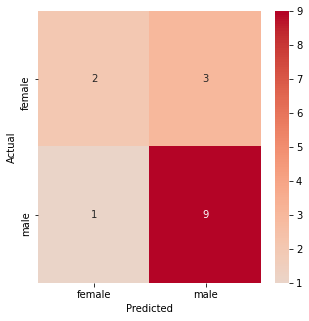

In [38]:
predictions = search.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

confusion_matrix_heatmap(confusion_matrix(y_test,predictions), search.classes_)

### Custom Preprocessing and Feature Extraction

Previous code used sklearn's tokenisation and bag-of-words

In [39]:
import ftfy
import nltk
import re

hashtag_re = re.compile(r"#\w+")
mention_re = re.compile(r"@\w+")
url_re = re.compile(r"(?:https?://)?(?:[-\w]+\.)+[a-zA-Z]{2,9}[-\w/#~:;.?+=&%@~]*")


def preprocess(text):
    p_text = hashtag_re.sub("[hashtag]",text)
    p_text = mention_re.sub("[mention]",p_text)
    p_text = url_re.sub("[url]",p_text)
    p_text = ftfy.fix_text(p_text)
    return p_text

tokenise_re = re.compile(r"(\[[^\]]+\]|[-'\w]+|[^\s\w\[']+)") #([]|words|other non-space)
def custom_tokenise(text):
    return tokenise_re.findall(text.lower())

def nltk_twitter_tokenise(text):
    twtok = nltk.tokenize.TweetTokenizer()
    return twtok.tokenize(text.lower())

In [40]:
vectorizer = CountVectorizer(input='filename', analyzer='word', tokenizer=custom_tokenise, preprocessor=preprocess)
feats = vectorizer.fit_transform(X_train)
feats.shape

(60, 65687)

In [41]:
vectorizer.get_feature_names()[::2500]

['!',
 "'too",
 '4x100m',
 'amatra',
 'battentastic',
 'bruise',
 "cleese's",
 'cv',
 'downsides',
 'extremists',
 'galeries',
 'harshly',
 'indictments',
 'kitzi',
 'mackerel',
 'monkeying',
 "of'",
 'pierce',
 'racially',
 'roughing',
 'shutdown',
 'stoke',
 'thunk',
 'untangle',
 'wit',
 '🌲🎉',
 '😱']

In [42]:
model = Pipeline([
    ('vectorizer', CountVectorizer(input='filename', analyzer='word',tokenizer=custom_tokenise, preprocessor=preprocess)),
    ('selector', SelectKBest(chi2, k=1000)),
    ('clf', LogisticRegression(solver='liblinear', random_state=0)),
])

In [43]:
cv_scores = cross_validate(model, X, y, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0), return_train_score=False, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
print_cv_scores_summary("Accuracy", cv_scores['test_accuracy'])
print_cv_scores_summary("Precision", cv_scores['test_precision_weighted'])
print_cv_scores_summary("Recall", cv_scores['test_recall_weighted'])
print_cv_scores_summary("F1", cv_scores['test_f1_weighted'])

Accuracy: mean = 66.67%, sd = 13.33%, min = 60.00, max = 93.33
Precision: mean = 69.36%, sd = 12.40%, min = 60.00, max = 93.94
Recall: mean = 66.67%, sd = 13.33%, min = 60.00, max = 93.33
F1: mean = 67.29%, sd = 12.92%, min = 60.00, max = 93.12
